<a href="https://colab.research.google.com/github/Agrover112/Differential-Evolution-with-Reversals/blob/main/DE_PyTorch_reversals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
 
 
# define objective function
def obj(x):
    return x[0]**2.0 + x[1]**2.0
 
 
# define mutation operation
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])
 
 
# define boundary check operation
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound
 
 
# define crossover operation
def crossover(mutated, target, dims, cr):
    # generate a uniform random value for every dimension
    p = rand(dims)
    # generate trial vector by binomial crossover
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial
 
 
def differential_evolution(pop_size, bounds, iter, F, cr):
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    obj_all = [obj(ind) for ind in pop]
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all)
    prev_obj = best_obj

    for i in range(iter):
        # iterate over all candidate solutions
        for j in range(pop_size):
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[choice(candidates, 3, replace=False)]
            print(a,b,c ,"Iteration",+i)
            # perform mutation
            mutated = mutation([a, b, c], F)
            # check that lower and upper bounds are retained after mutation
            mutated = check_bounds(mutated, bounds)
            # perform crossover
            trial = crossover(mutated, pop[j], len(bounds), cr)
            # compute objective function value for target vector
            obj_target = obj(pop[j])
            # compute objective function value for trial vector
            obj_trial = obj(trial)
            # perform selection
            if obj_trial < obj_target:
                # replace the target vector with the trial vector
                pop[j] = trial
                # store the new objective function value
                obj_all[j] = obj_trial
        # find the best performing vector at each iteration
        best_obj = min(obj_all)
        # store the lowest objective function value
        if best_obj < prev_obj:
            best_vector = pop[argmin(obj_all)]
            prev_obj = best_obj
            # report progress at each iteration
            print('Iteration: %d f([%s]) = %.5f' % (i, around(best_vector, decimals=5), best_obj))
    return [best_vector, best_obj]
 
 


In [ ]:
# define populationulationulationulation size
population_size = 10
# define lower and upper bounds for every dimension
bounds = asarray([(-5.0, 5.0), (-5.0, 5.0)])
# define number of iterations
iter = 100
# define scale factor for mutation
F = 0.5
# define crossover rate for recombination
cr = 0.7
 
# perform differential evolution
solution = differential_evolution(population_size, bounds, iter, F, cr)
print('\nSolution: f([%s]) = %.5f' % (around(solution[0], decimals=5), solution[1]))

[3.12203448 3.95952482] [ 3.11810745 -4.07427299] [1.33609578 3.73342413] Iteration 0
[-3.82671782  3.78710125] [ 3.11810745 -4.07427299] [-0.07571896  1.36893132] Iteration 0
[2.60403904 4.55669208] [1.33609578 3.73342413] [-3.82671782  3.78710125] Iteration 0
[3.12203448 3.95952482] [1.33609578 3.73342413] [1.35616955 4.65360901] Iteration 0
[-0.07571896  1.36893132] [1.33609578 3.73342413] [-2.84195479  0.01335151] Iteration 0
[3.12203448 3.95952482] [2.60403904 3.22896763] [-0.07571896  1.36893132] Iteration 0
[-2.22980462  1.06549909] [-2.84195479  0.01335151] [2.60403904 3.22896763] Iteration 0
[-0.07571896  1.36893132] [-2.22980462  1.06549909] [ 3.11810745 -4.07427299] Iteration 0
[1.35616955 4.65360901] [3.12203448 3.95952482] [1.33609578 3.73342413] Iteration 0
[-2.84195479  0.01335151] [2.2491389  4.76665935] [-0.07571896  1.36893132] Iteration 0
[2.2491389  4.76665935] [ 3.11810745 -4.07427299] [1.35616955 4.65360901] Iteration 1
[-2.84195479  0.01335151] [2.60403904 3.2289

# Coding DE from scratch

In [ ]:
def mutation(X,F): #X or solution
  res=X[0]+F*(X[1]-X[2])

def crossover(X):
  if random.random() <=crossover_rate:
    X=X
    return X
  

In [ ]:
bounds = asarray([(-5.0, 6.0), (-5.0, 6.0)])

In [ ]:
populationulationulation = bounds[:, 0] + (rand(5, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))

In [ ]:
populationulationulation

array([[-4.38126817,  2.92222116],
       [-2.91845582,  1.20315946],
       [-4.61222008, -4.6744363 ],
       [ 4.50652665,  4.72775385],
       [ 5.97147974,  5.67223146]])

In [ ]:
obj_all = [obj(ind) for ind in populationulationulation]

In [ ]:
print(obj_all)

[27.734887296424617, 9.964977080832574, 43.12292878817246, 42.660438955713474, 67.83278002968143]


In [ ]:
candidates = [candidate for candidate in range(populationulationulation_size) if candidate != j]

In [ ]:
print(candidates)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


# DE in PyTorch


In [ ]:
import os
import random
import numpy as np
import torch

def set_all_seeds(seed):
  random.seed(seed)
  np.random.seed(seed)
  torch.backends.cudnn.deterministic = True
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.benchmark = False
  torch.backends.cudnn.deterministic = True

In [ ]:
import torch 
from torch import rand,argmin,min,pow,clip,index_select,round

def obj(x):
    return pow(x[0],2.0) + pow(x[1],2.0) + pow(x[0],5.0) +torch.randn((1,1)).to(device) +pow(x[1]+x[0],10.0)

def mutation(x, F):
    return x[0] + F * (x[1] - x[2])

def check_bounds(mutated, bounds):  
    return torch.FloatTensor([clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))])


def crossover(mutated, target, dims, cr):
    # generate a uniform random value for every dimension
    p = rand(dims)
    # generate trial vector by binomial crossover
    trial = torch.FloatTensor([mutated[i] if p[i] < cr else target[i] for i in range(dims)])
    return trial

def differential_evolution(pop_size, bounds, iter, F, cr):
  
 
    #torch.set_grad_enabled(True)
    costs=[]
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    pop.to(device)
    obj_all = torch.FloatTensor([obj(ind) for ind in pop]).to(device)
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all).to(device)
    prev_obj = best_obj.to(device)

    for i in range(iter):
        for j in range(pop_size):
            candidates = torch.FloatTensor([candidate for candidate in range(pop_size) if candidate != j]).to(device)
            a,b,c=torch.multinomial(candidates,num_samples=3,replacement=False).to(device)
            a,b,c=index_select(pop,0,torch.tensor([a,b,c]))            
            #print(a,b,c)
            # perform mutation
            mutated = mutation(torch.vstack((a, b, c)), F).to(device)
            # check that lower and upper bounds are retained after mutation
            mutated = check_bounds(mutated, bounds)
            # perform crossover
            trial = crossover(mutated, pop[j], len(bounds), cr).to(device)
            # compute objective function value for target vector
            obj_target = obj(pop[j]).to(device)
            # compute objective function value for trial vector
            obj_trial = obj(trial).to(device)
            # perform selection
            if obj_trial < obj_target:
                # replace the target vector with the trial vector
                pop[j] = trial
                # store the new objective function value
                obj_all[j] = obj_trial
        # find the best performing vector at each iteration
        best_obj = min(obj_all)
        # store the lowest objective function value
        if best_obj < prev_obj:
            best_vector = pop[argmin(obj_all)]
            prev_obj = best_obj
            # report progress at each iteration
            print('Iteration: %d f([%s]) = %.5f' % (i, round(best_vector), best_obj))

        costs.append(best_obj.item())
    return [best_vector, best_obj.item(),costs]





def differential_evolution_reversals(pop_size, bounds, iter, F, cr,n_k,rev_iter):
  
 
    #torch.set_grad_enabled(True)
    costs=[]
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    pop.to(device)
    obj_all = torch.FloatTensor([obj(ind) for ind in pop]).to(device)
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all).to(device)
    prev_obj = best_obj.to(device)

    for i in range(iter):
        for j in range(pop_size):
            candidates = torch.FloatTensor([candidate for candidate in range(pop_size) if candidate != j]).to(device)
            a,b,c=torch.multinomial(candidates,num_samples=3,replacement=False).to(device)
            a,b,c=index_select(pop,0,torch.tensor([a,b,c]))            
            #print(a,b,c)
            # perform mutation
            mutated = mutation(torch.vstack((a, b, c)), F).to(device)
            # check that lower and upper bounds are retained after mutation
            mutated = check_bounds(mutated, bounds)
            # perform crossover
            trial = crossover(mutated, pop[j], len(bounds), cr).to(device)
            # compute objective function value for target vector
            obj_target = obj(pop[j]).to(device)
            # compute objective function value for trial vector
            obj_trial = obj(trial).to(device)
            # perform selection
            if obj_trial < obj_target:
                # replace the target vector with the trial vector
                pop[j] = trial
                # store the new objective function value
                obj_all[j] = obj_trial
        # find the best performing vector at each iteration
        if i % n_k ==0 and i !=1:
          for r in range(rev_iter):
              best_obj = max(obj_all)
              best_vector = pop[argmin(obj_all)]
              prev_obj = best_obj
              print('Reversal Iteration: %d f([%s]) = %.5f' % (r, round(best_vector), best_obj))
              costs.append(best_obj.item())
        else:
              best_obj = min(obj_all)
              # store the lowest objective function value
              if best_obj < prev_obj:
                  best_vector = pop[argmin(obj_all)]
                  prev_obj = best_obj
                  # report progress at each iteration
                  print('Iteration: %d f([%s]) = %.5f' % (i, round(best_vector), best_obj))

        costs.append(best_obj.item())
    return [best_vector, best_obj.item(),costs]

 

Defining config operations


In [ ]:
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
population_size = 100
# define lower and upper bounds for every dimension
bounds = torch.from_numpy(np.asarray([(-5.0, 5.0), (-5.0, 5.0)]))
# define number of iterations
iter = 20
# define scale factor for mutation
F = 0.5
# define crossover rate for recombination
cr = 0.7
 


Using device: cuda


In [ ]:
len(costs)

20

## Run and Compare DE vs DE with Reversals

In [ ]:
set_all_seeds(42)

In [ ]:
de=[]
de_reversed=[]
for i in range(24,55):
    set_all_seeds(i)
    soln,cost,costs=differential_evolution(population_size, bounds, iter, 0.5, 0.7)
    de.append(cost)
    soln,cost_rev,cost_reversal=differential_evolution_reversals(population_size, bounds, iter, 0.5, 0.7,25,5)
    de_reversed.append(cost_rev)

print(sum(de)/len(de))
print(sum(de_reversed)/len(de_reversed))

Iteration: 0 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3083.96045
Iteration: 6 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3084.37598
Iteration: 9 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3084.42505
Iteration: 12 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3084.57178
Iteration: 13 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3085.34253
Iteration: 19 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3085.45801
Reversal Iteration: 0 f([tensor([-5.,  4.], dtype=torch.float64)]) = 1032925568.00000
Reversal Iteration: 1 f([tensor([-5.,  4.], dtype=torch.float64)]) = 1032925568.00000
Reversal Iteration: 2 f([tensor([-5.,  4.], dtype=torch.float64)]) = 1032925568.00000
Reversal Iteration: 3 f([tensor([-5.,  4.], dtype=torch.float64)]) = 1032925568.00000
Reversal Iteration: 4 f([tensor([-5.,  4.], dtype=torch.float64)]) = 1032925568.00000
Iteration: 1 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3082.55029
Iteration: 3 f([tensor([-5.,  4.], dtype=torch.float64)]) = -30

In [ ]:
soln,cost,costs=differential_evolution(population_size, bounds, iter, 0.5, 0.7)

Iteration: 0 f([tensor([-5.,  3.], dtype=torch.float64)]) = -2898.02441
Iteration: 1 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3044.16772
Iteration: 3 f([tensor([-5.,  5.], dtype=torch.float64)]) = -3075.43457
Iteration: 4 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3082.57153
Iteration: 7 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3082.97119
Iteration: 10 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3083.64160
Iteration: 11 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3085.47388
Iteration: 16 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3085.68140
Iteration: 19 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3085.72046


In [ ]:
soln,cost,cost_reversal=differential_evolution_reversals(population_size, bounds, iter, 0.5, 0.7,25,5)

Reversal Iteration: 0 f([tensor([-5.,  5.], dtype=torch.float64)]) = 1449038080.00000
Reversal Iteration: 1 f([tensor([-5.,  5.], dtype=torch.float64)]) = 1449038080.00000
Reversal Iteration: 2 f([tensor([-5.,  5.], dtype=torch.float64)]) = 1449038080.00000
Reversal Iteration: 3 f([tensor([-5.,  5.], dtype=torch.float64)]) = 1449038080.00000
Reversal Iteration: 4 f([tensor([-5.,  5.], dtype=torch.float64)]) = 1449038080.00000
Iteration: 1 f([tensor([-5.,  5.], dtype=torch.float64)]) = -3075.98193
Iteration: 3 f([tensor([-5.,  5.], dtype=torch.float64)]) = -3076.46191
Iteration: 4 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3079.78955
Iteration: 5 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3082.22266
Iteration: 6 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3083.15479
Iteration: 8 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3083.21631
Iteration: 9 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3084.33423
Iteration: 11 f([tensor([-5.,  4.], dtype=torch.float64)]) = -3085

In [ ]:
def plot_costs(costs):
  import matplotlib.pyplot as plt
  plt.plot(costs)

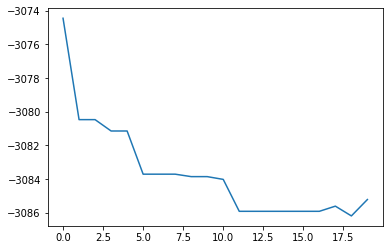

In [ ]:
plot_costs(costs)

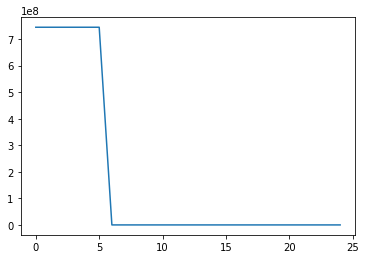

In [ ]:
plot_costs(cost_reversal)

In [ ]:
indices = torch.tensor([0,1,3])
x=torch.Tensor(((1,2,3,4)))

In [ ]:
torch.index_select(x, 0, indices)

tensor([1., 2., 4.])

In [ ]:
if pop_size<3:
    raise ValueError("A population of at least 3 is required for DE/rand/2/bin")
  
  if F<0 or F>2:
    raise ValueError("Differential weight F is between {0,2} only")

  if cr<0 or cr>1:
    raise ValueError("Crossover Rate cr is between {0,1} only being probabilities")